# Ïã§Ïäµ 5:Numerical Sol (Root of Equ), Integration, Differentiation (2023.10.18)
### ÎπÖÎç∞Ïù¥ÌÑ∞ÏàòÏπòÌï¥ÏÑù ÏûÖÎ¨∏ Î∞è Ïã§Ïäµ
### ÏàôÎ™ÖÏó¨ÏûêÎåÄÌïôÍµê Í∏∞Í≥ÑÏãúÏä§ÌÖúÌïôÎ∂Ä Ïã¨Ï£ºÏö©

- Reference: Advanced Engineering Mathematics Book by Erwin Kreyszig



# Î¨∏Ï†ú 6.

‚ÄúÎπÖÎç∞Ïàò Ïã§Ïäµ2 SVD, PCA, Eigen Face‚Äù Ïã§ÏäµÏóêÏÑú ÏÇ¨Ïö©Ìïú dog.jpg ÏÇ¨ÏßÑÏùÑ Singular Value Decomposition ÌñàÏùÑ Îïå Î™á Î≤àÏß∏ Rank-r SVD Approximation ÌñàÏùÑ Îïå Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò 85%Ïù¥ÏÉÅÏùò VarianceÎ•º Ïú†ÏßÄÌï† Ïàò ÏûàÎäî ÏßÄ Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî.

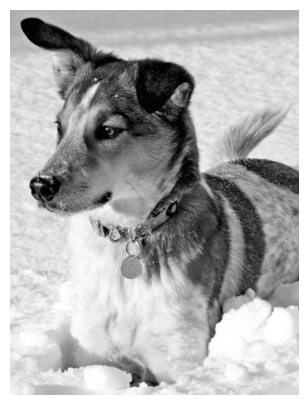

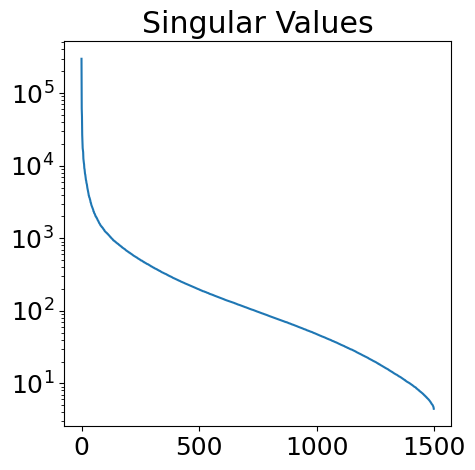

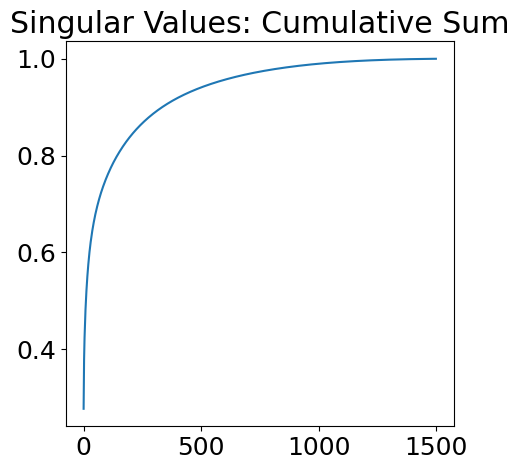

1

In [57]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [12, 6]

from urllib.request import urlretrieve
urlretrieve('https://github.com/jooyongsim/numerical2023/blob/main/src/dog.jpg?raw=true','dog.jpg')
A = imread('dog.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

%matplotlib inline
plt.figure(figsize=[5,5])
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

plt.figure(figsize=[5,5])
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(figsize=[5,5])
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

s_cumsums_2 = np.cumsum(np.diag(S)**2)
s_sum_2 = np.sum(np.diag(S)**2)
criteria = s_cumsums_2/s_sum_2 >=0.85
n = s_cumsums_2.shape[0]
np.arange(1,n+1)[criteria].min()

In [58]:
criteria = s_cumsums_2/s_sum_2 >=0.95 # 95% Ïù¥ÏÉÅ varianceÎ•º ÏÑ§Î™ÖÌïòÎäî Rank-r approximationÏùÑ Íµ¨ÌïúÎã§Î©¥
print('criteria: ',criteria)
n = s_cumsums_2.shape[0]
print('n: ',n)
print('np.arange(1,n+1)[criteria]: ',np.arange(1,n+1)[criteria])
print('np.arange(1,n+1)[criteria].min(): ', np.arange(1,n+1)[criteria].min())

criteria:  [False False  True ...  True  True  True]
n:  1500
np.arange(1,n+1)[criteria]:  [   3    4    5 ... 1498 1499 1500]
np.arange(1,n+1)[criteria].min():  3


# Î¨∏Ï†ú 7.

‚ÄúÎπÖÎç∞Ïàò Ïã§Ïäµ2 SVD, PCA, Eigen Face‚Äù Ïã§Ïäµ Ï§ë Ovarian Cancer Gene DataÏóêÏÑú first principal component Î°ú ÏïîÌôòÏûêÏôÄ Ï†ïÏÉÅÏù∏ÏùÑ Z=0ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Íµ¨Î≥ÑÌïúÎã§Í≥† ÌïòÏòÄÏùÑ Îïå Í∏∞Ï§ÄÏù¥ ÎêòÎäî Í∞íÏùÑ Ï†ïÌïòÍ≥† Í∑∏Îïå Ï†ÑÏ≤¥ ÌôòÏûê Ï§ëÏóêÏÑú ÌôòÏûêÍ∞Ä ÏïÑÎãàÎùºÍ≥† Íµ¨Î≥ÑÌïòÎäî Í≤ΩÏö∞Ïùò Ï†ïÌôïÎèÑ %ÏôÄ Ï†ïÏÉÅÏù∏Ï§ëÏóêÏÑú Ï†ïÏÉÅÏù∏Ïù¥ ÏïÑÎãàÎùºÍ≥† Íµ¨Î≥ÑÌïòÍ≤å ÎêòÎäî Í≤ΩÏö∞Ïùò Ï†ïÌôïÎèÑ %Î•º Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî.

number of patient: 216


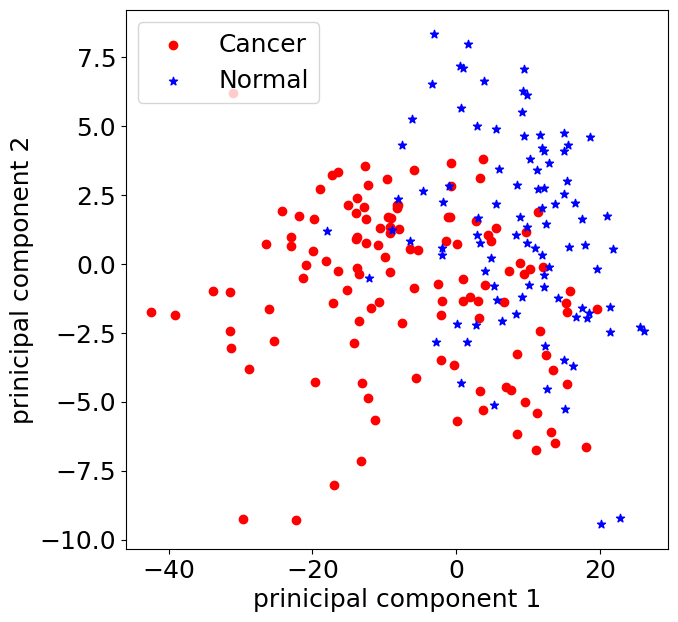

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

urlretrieve('https://jooyongsim.github.io/numerical2023/src/ovariancancer_obs.csv','ovariancancer_obs.csv')
urlretrieve('https://jooyongsim.github.io/numerical2023/src/ovariancancer_grp.csv','ovariancancer_grp.csv')

obs = np.loadtxt('ovariancancer_obs.csv',delimiter=',')

f = open('ovariancancer_grp.csv', "r")
grp = f.read().split("\n")
grp = grp[:-1]
print('number of patient:', len(grp))
grp = np.array(grp)

obs_mean = obs - obs.mean(0)

U, S, VT = np.linalg.svd(obs_mean,full_matrices=False)

Z = obs_mean@VT.transpose()
classes = np.unique(grp)
i_pat = np.array(grp) == classes[0]
i_normal = np.array(grp) == classes[1]

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot()
ax.scatter(Z[i_pat,0],Z[i_pat,1],marker='o',color='r', label = classes[0])
ax.scatter(Z[i_normal,0],Z[i_normal,1],marker='*',color='b', label = classes[1])
ax.set_xlabel('prinicipal component 1')
ax.set_ylabel('prinicipal component 2')
ax.legend()
plt.show()

ÎåÄÎûµÏ†ÅÏúºÎ°ú pc1 = 0ÏùÑ Í∏∞Ï§ÄÏùÑ ÎëêÍ∑∏Î£πÏùÑ ÎÇòÎàå Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§. Ïù¥Îïå ÏïÑÎûòÏôÄ Í∞ôÏù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥ Normal, ÏûëÏúºÎ©¥ Cancer PatientÎ°ú ÎÇòÎààÎã§Í≥† Ìï¥Î≥¥Ïûê. pc1 Í∞íÎßå Í∏∞Ï§ÄÏúºÎ°ú ÎÇòÎàÑÏóàÏùÑ Îïå Ï†ïÌôïÎèÑÎäî Íµ¨Î≥Ñ Ï†ïÌôïÎèÑÎäî 73.6% Ïù¥Îã§.



In [61]:
pc1 = Z[:,0]
pred = np.where(pc1>=0,'Normal', 'Cancer')

sum(pred == grp)/grp.size*100

73.61111111111111

In [62]:
pred = np.where(pc1>=0,'Normal', 'Cancer')
pred

array(['Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'Normal', 'Normal', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'Cancer', 'Normal', 'Normal', 'Cancer', 'Cancer', 'Cancer',
       'Cancer', 'Cancer', 'Normal', 'Cancer', 'Normal', 'Cancer',
       'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Normal', 'Normal',
       'Normal', 'Cancer', 'Cancer', 'Cancer', 'Normal', 'Normal',
       'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Normal', 'Cancer',
       'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'Normal', 'Cancer', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Cancer', 'Normal',
       'Cancer', 'Normal', 'Cancer', 'Normal', 'Cancer', 'Cancer',
       'Cancer', 'Normal', 'Normal', 'Cancer', 'Normal', 'Normal',
       'Cancer', 'Cancer', 'Cancer', 'Normal', 'Cancer', 'Normal',
       'Normal', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Normal',
       'Normal', 'Cancer', 'Cancer', 'Cancer', 'Normal', 'Norm

In [63]:
print('ÌôòÏûêÎ•º ÌôòÏûêÎ°ú Ïù∏ÏãùÌïòÎäî Ï†ïÌôïÎèÑ {}'.format(sum(pred[i_pat] == 'Cancer')/pred[i_pat].size*100))
print('Ï†ïÏÉÅÏù∏ÏùÑ Ï†ïÏÉÅÏúºÎ°ú Ïù∏ÏãùÌïòÎäî Ï†ïÌôïÎèÑ {}'.format(sum(pred[i_normal] == 'Normal')/pred[i_normal].size*100))

ÌôòÏûêÎ•º ÌôòÏûêÎ°ú Ïù∏ÏãùÌïòÎäî Ï†ïÌôïÎèÑ 65.28925619834712
Ï†ïÏÉÅÏù∏ÏùÑ Ï†ïÏÉÅÏúºÎ°ú Ïù∏ÏãùÌïòÎäî Ï†ïÌôïÎèÑ 84.21052631578947


# Î¨∏Ï†ú 9.

ÎπÖÎç∞Ïàò Ïã§Ïäµ2 SVD, PCA, Eigen Face‚Äù Ïã§Ïäµ Ï§ë Ovarian Cancer Gene DataÏóêÏÑú 2Î™ÖÏùò Ïú†Ï†ÑÏûê Îç∞Ïù¥ÌÑ∞Í∞Ä ‚Äúovariancancer_obs_test.csv‚ÄùÏóê Ï†ÄÏû•ÎêòÏñ¥ Î¨∏Ï†úÏôÄ Ìï®Íªò ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§. Ïù¥Îïå Í∞ÅÍ∞Å ÏÇ¨ÎûåÏùò Ïú†Ï†ÑÏûê Îç∞Ïù¥ÌÑ∞Ïùò first principal componentÎ•º Ïù¥Ïö©ÌïòÏó¨ ÏúÑ Í∏∞Ï§ÄÏóêÏÑú 2Í∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ÅÍ∞Å ÌôòÏûêÏù∏ÏßÄ Ï†ïÏÉÅÏù∏Ïù∏ÏßÄ Íµ¨Î≥ÑÌïòÏÑ∏Ïöî.

In [65]:
urlretrieve('https://jooyongsim.github.io/numerical2023/ovariancancer_obs_test.csv','ovariancancer_obs_test.csv')

obs_test = np.loadtxt('ovariancancer_obs_test.csv',delimiter=',')
obs_test_mean = obs_test - obs.mean(0)

Ï≤´Î≤àÏß∏ ÌôòÏûêÏùò PC1 ÏùÑ Íµ¨Ìï¥Î≥¥Ïûê. ÏïÑÎûòÏôÄ Í∞ôÏù¥ 0Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÏÉÅÏù∏



In [66]:
obs_test_mean[0]@VT.T[:,0]

5.230125685170194

ÎëêÎ≤àÏß∏ ÌôòÏûêÏùò PC1 ÏùÑ Íµ¨Ìï¥Î≥¥Ïûê. ÏïÑÎûòÏôÄ Í∞ôÏù¥ 0Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÏÉÅÏù∏



In [67]:
obs_test_mean[1]@VT.T[:,0]

11.920704126664416

# Î¨∏Ï†ú 10.

Î¨∏Ï†úÏôÄ Ìï®Íªò Ï£ºÏñ¥ÏßÑ ‚Äòrandom_data.csv‚ÄôÎäî Ï¥ù 10000Í∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ÅÍ∞Å ÎëêÍ∞úÏùò Î≥ÄÏàò(Ïòà, x, y ÎòêÎäî x1, x2)Ïóê ÎåÄÌï¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§. Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò principal component analysisÎ•º Ïù¥Ïö©Ìï¥ÏÑú (2, 4)Ïùò Îç∞Ïù¥ÌÑ∞ (Ï¶â, x = 2, y =4)Ïóê ÎåÄÌïú principal component 1Í≥º 2Î•º Íµ¨ÌïòÏÑ∏Ïöî.

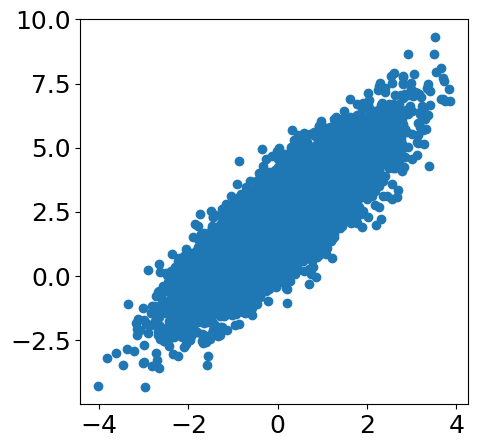

In [69]:
urlretrieve('https://jooyongsim.github.io/numerical2023/random_data.csv','random_data.csv')

data = np.loadtxt('random_data.csv',delimiter=',')
x = data[0,:]
y = data[1,:]

plt.figure(figsize=[5,5])
plt.scatter(x,y)
plt.show()

In [70]:
# data_mean = data.T - np.tile(data.mean(1).T,(data.shape[1],1))
# ÏïÑÎûò centering Ïó∞ÏÇ∞ÏùÄ ÏúÑ Ïó∞ÏÇ∞Í≥ºÏôÄ Í∞ôÏùå
x_mean = x - x.mean()
y_mean = y - y.mean()
data_mean = np.stack((x_mean, y_mean))
data_mean = data_mean.T
data_mean.shape

(10000, 2)

Ï£ºÏùò! Ïó¨Í∏∞ÏÑú Ïã§ÌóòÏùÄ 10000Î≤à, Í∞ÅÍ∞ÅÏùò Ïã§ÌóòÏóêÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä x, y ÎëêÍ∞ÄÏßÄ Î≥ÄÏàòÍ∞Ä ÏûàÏùå.
Îî∞ÎùºÏÑú matrixÎäî (2,10000) Ïù¥ ÏïÑÎãàÎùº, (10000,2)Î°ú Î≥ÄÌôòÌïòÏó¨Ïïº Ìï©ÎãàÎã§!



In [71]:
U, S, VT = np.linalg.svd(data_mean,full_matrices=False)
Z = data_mean@VT.transpose()

Ïù¥Ï†ú ÏúÑÏôÄÍ∞ôÏù¥ PCAÎ•º ÏàòÌñâÌï©ÎãàÎã§. Ïù¥Îïå covariance matrixÏùò eigen vectors ÎòêÎäî \ PCAÏùò weight vectors ÎòêÎäî loading vectorsÎäî ÏïÑÎûò matrixÏùò column vectorsÏôÄ Í∞ôÏäµÎãàÎã§.

In [72]:
VT.T


array([[ 0.49966755,  0.86621726],
       [ 0.86621726, -0.49966755]])

pc1Í≥º pc2Î•º ÎπÑÍµêÌïòÎ©¥ pc1Ïùò varianceÍ∞Ä ÏµúÎåÄÌôîÎêòÏóàÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.



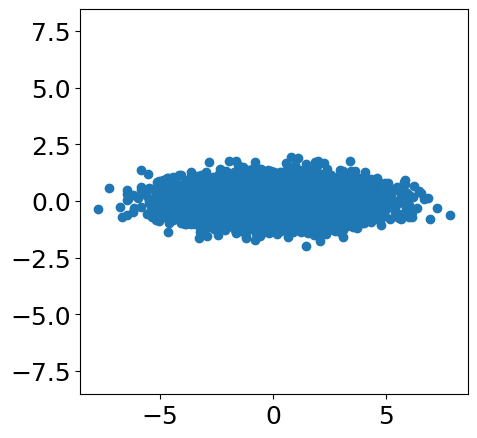

In [73]:
pc1 = data_mean@VT.T[:,0]
pc2 = data_mean@VT.T[:,1]

plt.figure(figsize=[5,5])
plt.scatter(pc1,pc2)
plt.axis('equal')
plt.show()

In [74]:
test_data = [2, 4]
test_data@VT.T

array([ 4.46420414, -0.26623566])

In [75]:
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò pc1 = {}, pc2 = {}'.format(*(test_data@VT.T)))

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò pc1 = 4.464204136806038, pc2 = -0.2662356567476618


## Î¨∏Ï†ú 11. (Í≥µÌïôÏàòÌïô Chapter 20.5 Ïó∞ÏäµÎ¨∏Ï†ú 1Î≤à, Least Squares)

Fit a straight line to the given points by least squares. Show the details. Check your result by sketching the points and the line. Judge the goodness of fit.

Ï£ºÏñ¥ÏßÑ Ï†êÏóê Least Squares(ÏµúÏÜå Ï†úÍ≥±Î≤ï)ÏúºÎ°ú ÏßÅÏÑ† Î™®Îç∏ÏùÑ FittingÌïòÏÑ∏Ïöî. Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ÏôÄ ÏòàÏ∏°ÏÑ†ÏùÑ Í∑∏Î†§ÏÑú ÏòàÏ∏°ÏÑ†Ïù¥ Ï†ÅÌï©ÌïúÏßÄ Í≤∞Í≥ºÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.

Îç∞Ïù¥ÌÑ∞: (0, 2), (2, 0), (3, 2), (5, 3)


-1.0384615384615383 1.8461538461538458


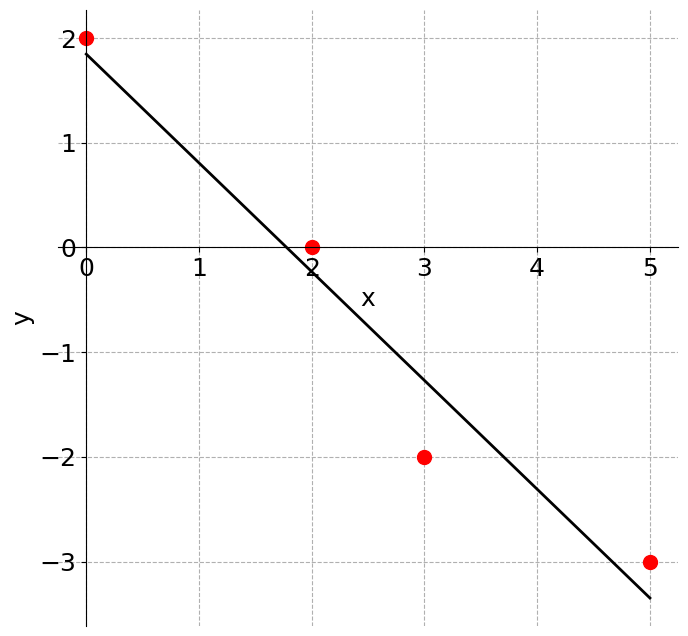

In [53]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

a = 3 # True slope
b = 5
x = np.array([0, 2, 3, 5])
y = np.array([2, 0, -2, -3])

A = np.stack((x,np.ones(x.shape)),axis=1)
B = y

U, S, VT = np.linalg.svd(A,full_matrices=False)
pinv = VT.T @ np.linalg.inv(np.diag(S)) @ U.T
(a, b) =  pinv @ B # Least-square fit
print(a, b)

xl = np.arange(0,5.2,0.2)
yl = a*xl+b

fig, ax = plt.subplots()
ax.plot(xl, yl, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'o', color='r', markersize = 10, label='Noisy data') # Noisy measurements
ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Î¨∏Ï†ú 12. (Í≥µÌïôÏàòÌïô Chapter 20.5 Ïó∞ÏäµÎ¨∏Ï†ú 4Î≤à, A Hooke‚Äôs Law Example of Least Squares)

Hooke‚Äôs law F=kx: Estimate the spring modulus k from the force F [N] and the elongation x [m], where (F, x) is (1, 0.3), (2, 0.7), (4, 1.3), (6, 1.9), (10, 3.2), (20, 6.3).

Îã§Ïùå Ìûò F [N]ÏôÄ Î≥ÄÏúÑ x [m] Ï∏°Ï†ï Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Hooke‚Äôs law F=kxÏùò Ïä§ÌîÑÎßÅÏÉÅÏàò kÎ•º Ï∂îÏ†ïÌïòÏÑ∏Ïöî. (F, x)Îäî (1, 0.3), (2, 0.7), (4, 1.3), (6, 1.9), (10, 3.2), (20, 6.3)ÏûÖÎãàÎã§.


[0.31757813] 0.01914062499999991
spring constant = 0.31757812500000004 N/m


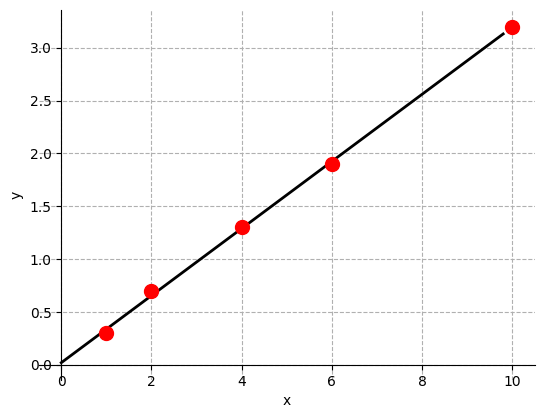

In [47]:
x = [1, 2, 4, 6, 10]
y = [0.3, 0.7, 1.3, 1.9, 3.2]
x = np.array(x)
x = x[:,np.newaxis]  # x should be always => dimension >2
y = np.array(y)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
a, b = reg.coef_, reg.intercept_

print(a, b)

xl = np.arange(0,10,0.2)
yl = a*xl+b

fig, ax = plt.subplots()
ax.plot(xl, yl, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'o', color='r', markersize = 10, label='Noisy data') # Noisy measurements
ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

print('spring constant = {} N/m'.format(a[0]))

# Î¨∏Ï†ú13 Newton-Raphson

ùëì(ùë•) = 2 sin(‚àöùë•) ‚àí ùë• + 1

(a) Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ Í∑ºÏÇ¨Ï†ÅÏúºÎ°úxÏùò Í∑ºÏùÑ ÏòàÏ∏°ÌïòÏãúÏò§.

(b) Newton-Raphson Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Íµ¨ÌïòÏãúÏò§. Ï¥àÍ∏∞ Í∞ÄÏ†ïÏúºÎ°ú x0=1Î•º ÏÇ¨Ïö©ÌïòÍ≥† Í∑ºÏÇ¨ÏÉÅÎåÄÏò§Ï∞® ea<0.001%ÍπåÏßÄ Í≥ÑÏÇ∞ÌïòÏãúÏò§.



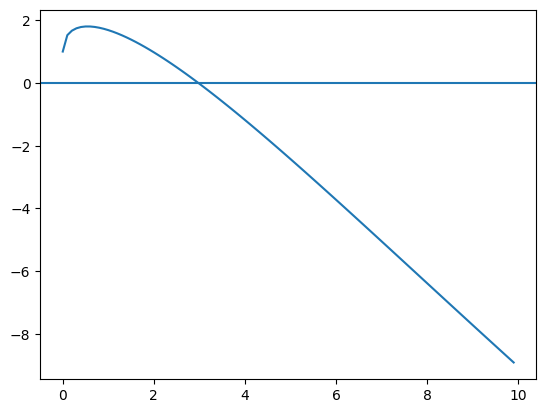

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return 2*np.sin(x**(1/2))-x+1

x = np.arange(0,10,0.1)

plt.plot(x,func(x))
plt.axhline()

In [6]:
import numpy as np
def func(x):
    return 2*np.sin(x**(1/2))-x+1
def func_p(x):
    return -2*np.cos(x**(1/2))*1/2*x**(-1/2)-1

import numpy as np


N = 10; x0 = 1; tol = 1e-5; xn = x0
for i in range(N):
    xnn = xn - func(xn)/func_p(xn)
    error = (xnn - xn)/xnn
    print(f'n:{i}, xn:{xn:.6f}, xn+1:{xnn:.6f}, error:{error:.6e}')
    xn = xnn
    if abs(error) < tol:
        break

print(f'Solution of  2*sin(x^(1/2))-x+1=0 is {xn:.6f}')

n:0, xn:1.000000, xn+1:2.092605, error:5.221267e-01
n:1, xn:2.092605, xn+1:2.914223, error:2.819339e-01
n:2, xn:2.914223, xn+1:2.987262, error:2.444990e-02
n:3, xn:2.987262, xn+1:2.974020, error:-4.452486e-03
n:4, xn:2.974020, xn+1:2.976644, error:8.816419e-04
n:5, xn:2.976644, xn+1:2.976132, error:-1.721288e-04
n:6, xn:2.976132, xn+1:2.976232, error:3.370117e-05
n:7, xn:2.976232, xn+1:2.976212, error:-6.594727e-06
Solution of  2*sin(x^(1/2))-x+1=0 is 2.976212


# Î¨∏Ï†ú 14

$ùëì(ùë•) = 2ùë•^3‚àí11.7ùë•^2 + 17.7ùë• ‚àí 6$

(a) Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ Í∑ºÏÇ¨Ï†ÅÏúºÎ°úxÏùò Í∑ºÏùÑ ÏòàÏ∏°ÌïòÏãúÏò§.

(b) Newton-Raphson Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏãúÏò§. Ï¥àÍ∏∞ Í∞ÄÏ†ïÏúºÎ°ú x0=3Î•º ÏÇ¨Ïö©ÌïòÍ≥† Í∑ºÏÇ¨ÏÉÅÎåÄÏò§Ï∞® e<0.001%ÍπåÏßÄ Í≥ÑÏÇ∞ÌïòÏãúÏò§

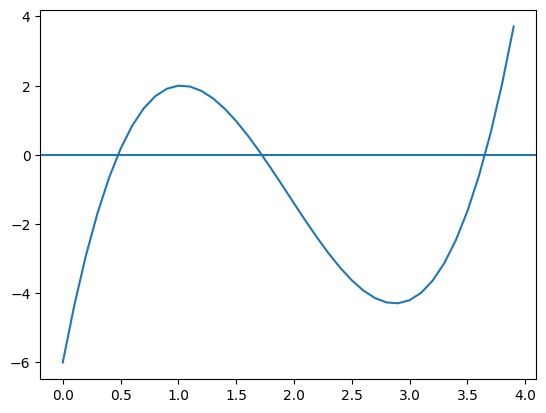

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return 2*x**3-11.7*x**2+17.7*x-6

x = np.arange(0,4,0.1)

plt.plot(x,func(x))
plt.axhline()

In [10]:
def func(x):
    return 2*x**3-11.7*x**2+17.7*x-6
def func_p(x):
    return 6*x**2-23.4*x+17.7

import numpy as np

N = 10; x0 = 3; tol = 1e-5; xn = x0
for i in range(N):
    xnn = xn - func(xn)/func_p(xn)
    error = (xnn - xn)/xnn
    print(f'n:{i}, xn:{xn:.6f}, xn+1:{xnn:.6f}, error:{error:.6e}')
    xn = xnn
    if abs(error) < tol:
        break

print(f'Solution of  2*sin(x^(1/2))-x+1=0 is {xn:.6f}')

n:0, xn:3.000000, xn+1:5.800000, error:4.827586e-01
n:1, xn:5.800000, xn+1:4.686948, error:-2.374790e-01
n:2, xn:4.686948, xn+1:4.037685, error:-1.608007e-01
n:3, xn:4.037685, xn+1:3.734625, error:-8.114882e-02
n:4, xn:3.734625, xn+1:3.656393, error:-2.139586e-02
n:5, xn:3.656393, xn+1:3.651167, error:-1.431438e-03
n:6, xn:3.651167, xn+1:3.651144, error:-6.247013e-06
Solution of  2*sin(x^(1/2))-x+1=0 is 3.651144


# Í≥ºÏ†ú 15

Îã§Ïùå Ìï®ÏàòÏùò Í∑ºÏùÑ Íµ¨ÌïòÏãúÏò§. Ï¥àÍ∏∞ Í∞ÄÏ†ïÏúºÎ°ú x0=5Î•º ÏÇ¨Ïö©ÌïòÍ≥† e<0.01% ÍπåÏßÄ Í≥ÑÏÇ∞ÌïòÏãúÏò§.

$ùëì(ùë•) = ‚àí0.9ùë•^2 + 1.7ùë• + 2.5$

(a) Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ Í∑ºÏÇ¨Ï†ÅÏúºÎ°ú xÏùò Í∑ºÏùÑ ÏòàÏ∏°ÌïòÏãúÏò§.

(b) Newton-Raphson Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Í∑ºÏùÑ Íµ¨ÌïòÏãúÏò§.

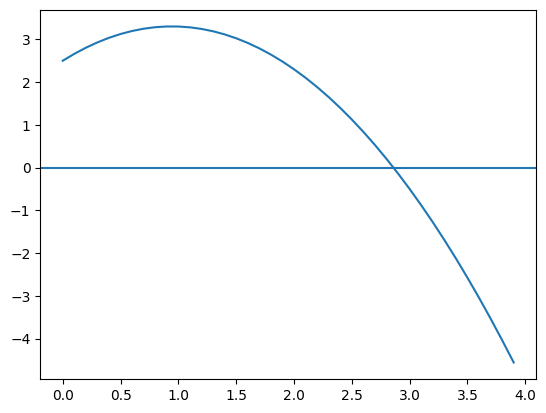

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return -0.9*x**2+1.7*x+2.5
def func_p(x):
    return -1.8*x+1.7

x = np.arange(0,4,0.1)

plt.plot(x,func(x))
plt.axhline()

In [16]:
def func(x):
    return -0.9*x**2+1.7*x+2.5
def func_p(x):
    return -1.8*x+1.7
import numpy as np

N = 10; x0 = 5; tol = 1e-4; xn = x0
for i in range(N):
    xnn = xn - func(xn)/func_p(xn)
    error = (xnn - xn)/xnn
    print(f'n:{i}, xn:{xn:.6f}, xn+1:{xnn:.6f}, error:{error:.6e}')
    xn = xnn
    if abs(error) < tol:
        break

print(f'Solution of  2*sin(x^(1/2))-x+1=0 is {xn:.6f}')

n:0, xn:5.000000, xn+1:3.424658, error:-4.600000e-01
n:1, xn:3.424658, xn+1:2.924357, error:-1.710805e-01
n:2, xn:2.924357, xn+1:2.861147, error:-2.209255e-02
n:3, xn:2.861147, xn+1:2.860105, error:-3.644225e-04
n:4, xn:2.860105, xn+1:2.860104, error:-9.913887e-08
Solution of  2*sin(x^(1/2))-x+1=0 is 2.860104


# Î¨∏Ï†ú 16

Îã§Ïùå Ìï®ÏàòÏóê ÎåÄÌï¥

$f(x) = x^2e^-x/\sqrt{1+x^2}$

(a) x=0 Î∂ÄÌÑ∞ x=2 ÏÇ¨Ïù¥ÍπåÏßÄ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Í≥†

(b) x=0, x=1, Í∑∏Î¶¨Í≥† x=2Ïùº Îïå 3Í∞úÏùò Ï†êÏùÑ Ïù¥Ïö©ÌïòÏó¨ 2Ï∞® Îã§Ìï≠ÏãùÏúºÎ°ú interpolationÌïú Ìï®ÏàòÎ•º Ìï®Íªò ÎπÑÍµêÌïòÏó¨ Í∑∏Î¶¨ÏÑ∏Ïöî.


Design Matrix for  $y = ax^2+bx+c $

$A*\beta = y$,
$ \beta = [a, b, c]$

In [38]:
# design matrix A*beta = y (beta = ax^2+bx+c = y)
def func(x):
  return x**2*np.exp(-x)/np.sqrt(1+x*2)

x = np.array([0, 1, 2])
dm = np.stack((x**2, x, np.ones(3)),axis=1)
[a,b,c] = np.linalg.inv(dm)@func(x)

dm, x, func(x), [a,b,c]

(array([[0., 0., 1.],
        [1., 1., 1.],
        [4., 2., 1.]]),
 array([0, 1, 2]),
 array([0.        , 0.21239529, 0.24209511]),
 [-0.09134773716115985, 0.30374303155082116, 0.0])

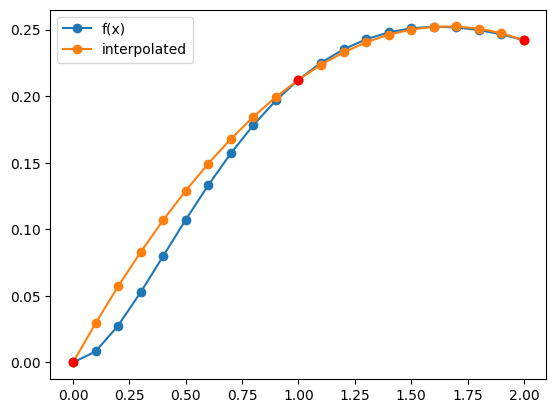

In [46]:
x = np.arange(0,2.1,0.1)
plt.plot(x,func(x),'-o')
plt.plot(x,a*x**2+x*b+c,'o-')
plt.plot([0,1,2],func(np.array([0,1,2])),'ro')
plt.legend(['f(x)', 'interpolated'])

(array([[0., 0., 1.],
        [1., 1., 1.],
        [4., 2., 1.]]),
 array([0, 1, 2]))


##  Numerical Sol (Root of Equ): Secant Method

Let's find a solution (root) of equation $ x^2=2 $ or $ x-2sinx=0 $


In [ ]:
def func(x):
    return x**2-2

N = 10; x0 = 2; x1 = 1.9; tol = 1e-5; xn_1 = x0; xn = x1

for i in range(N):
    fp = (func(xn)-func(xn_1))/(xn-xn_1)

    xnn = xn - func(xn)/fp

    error = (xnn - xn)/xnn
    print(f'n:{i+1}, xn-1:{xn_1:.6f}, xn:{xn:.6f}, xn+1:{xnn:.6f}, error:{error:.6e}')

    xn_1 = xn; xn = xnn
    if abs(error) < tol:
        break

print(f'Solution of x-2sin(x)=0 is {xn:.6f}')

n:1, xn-1:2.000000, xn:1.900000, xn+1:1.487179, error:-2.775862e-01
n:2, xn-1:1.900000, xn:1.487179, xn+1:1.424678, error:-4.387041e-02
n:3, xn-1:1.487179, xn:1.424678, xn+1:1.414476, error:-7.212909e-03
n:4, xn-1:1.424678, xn:1.414476, xn+1:1.414215, error:-1.847388e-04
n:5, xn-1:1.414476, xn:1.414215, xn+1:1.414214, error:-6.833768e-07
Solution of x-2sin(x)=0 is 1.414214


## Numerical Integration: Rectangular rule and trapezoidal rule

Here we will integrate a function for a given range. Consider a function $f(x)=e^{-x^2}$ from 0 to 1. First, integrate the function analytically.

In [ ]:
import sympy

x = sympy.symbols("x")
exp = sympy.exp(-x**2)
exact_awnwer = sympy.integrate(exp, (x, 0, 1)).evalf(8)
exact_awnwer

0.74682413

In [ ]:
import numpy as np

# trapezoidal
def func(x):
    return np.exp(-x**2)

N = 10
h = 1/N
int_sum = 0 # integration Í∞íÏùÑ Îã¥Îäî Í∑∏Î¶á
xj = 0
for j in range(N+1):
    if j == 0 or j == N:
        int_sum += func(xj)*0.5*h
    else:
        int_sum += func(xj)*h
    print('j= {:<2}, xj= {:<3}, function= {:<5}'.format(j, np.round(xj,2), func(xj)))
    xj += h
print(int_sum)

trape_error = int_sum-exact_awnwer
print('% error trapezoidal:',abs(trape_error/exact_awnwer*100))

j= 0 , xj= 0  , function= 1.0  
j= 1 , xj= 0.1, function= 0.9900498337491681
j= 2 , xj= 0.2, function= 0.9607894391523232
j= 3 , xj= 0.3, function= 0.9139311852712282
j= 4 , xj= 0.4, function= 0.8521437889662113
j= 5 , xj= 0.5, function= 0.7788007830714049
j= 6 , xj= 0.6, function= 0.697676326071031
j= 7 , xj= 0.7, function= 0.6126263941844161
j= 8 , xj= 0.8, function= 0.5272924240430487
j= 9 , xj= 0.9, function= 0.4448580662229412
j= 10, xj= 1.0, function= 0.3678794411714424
0.7462107961317493
% error trapezoidal: 0.0821260388973603


In [ ]:
import numpy as np

# rectangular rule
def func(x):
    return np.exp(-x**2)

N = 10
h = 1/N
int_sum = 0 # integration Í∞íÏùÑ Îã¥Îäî Í∑∏Î¶á
xj = 0
for j in range(N):
    if j == 0:
        xj = xj + h/2
    else:
        xj = xj + h

    int_sum += func(xj)*h
    print('j= {:<2}, xj= {:<3}, function= {:<5}'.format(j, np.round(xj,2), func(xj)))
    xj += h
print(int_sum)

trape_error = int_sum-exact_awnwer
print('% error trapezoidal:',abs(trape_error/exact_awnwer*100))

j= 0 , xj= 0.05, function= 0.9975031223974601
j= 1 , xj= 0.25, function= 0.9394130628134758
j= 2 , xj= 0.45, function= 0.8166864825981108
j= 3 , xj= 0.65, function= 0.6554062543268406
j= 4 , xj= 0.85, function= 0.48553689515407955
j= 5 , xj= 1.05, function= 0.3320399453446608
j= 6 , xj= 1.25, function= 0.2096113871510978
j= 7 , xj= 1.45, function= 0.12215066953998995
j= 8 , xj= 1.65, function= 0.0657102732275028
j= 9 , xj= 1.85, function= 0.032630755992895964
0.4656688848546115
% error trapezoidal: 37.6467813308141


## Numerical Differentiation

Let's go through an example of differentiation for the function $f(x)=e^{-x^2}$ from 0 to 1 with 0.1 interval.

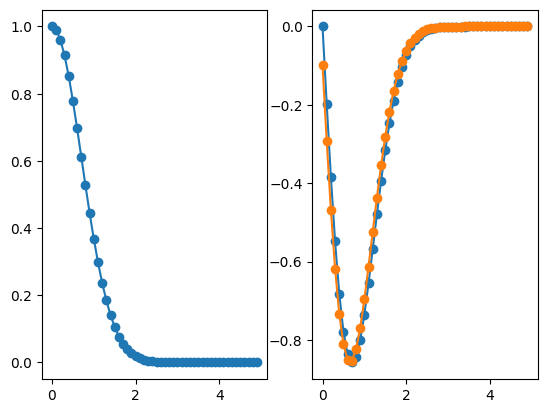

In [ ]:
def func(x):
    return np.exp(-x**2)
def func_p(x):
    return -2*x*np.exp(-x**2)
x = np.arange(0,5.1,0.1)
fp = (func(x[1:])-func(x[:-1]))/0.1

import matplotlib.pyplot as plt
plt.subplot(121)
plt.plot(x[:-1],func(x[:-1]),'o-')
plt.subplot(122)
plt.plot(x[:-1],func_p(x[:-1]),'o-')
plt.plot(x[:-1],fp,'-o')

In [ ]:
!jupyter nbconvert --to html solution.ipynb

[NbConvertApp] Converting notebook solution.ipynb to html
[NbConvertApp] Writing 634227 bytes to solution.html
